# Loop 102 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the exact CV-LB relationship from all submissions?
2. What approaches have been tried and what patterns emerge?
3. What is the gap to target and what would it take to close it?
4. What approaches have NOT been tried that could change the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'CV': 0.0111, 'LB': 0.0982},
    {'exp': 'exp_001', 'CV': 0.0123, 'LB': 0.1065},
    {'exp': 'exp_003', 'CV': 0.0105, 'LB': 0.0972},
    {'exp': 'exp_005', 'CV': 0.0104, 'LB': 0.0969},
    {'exp': 'exp_006', 'CV': 0.0097, 'LB': 0.0946},
    {'exp': 'exp_007', 'CV': 0.0093, 'LB': 0.0932},
    {'exp': 'exp_009', 'CV': 0.0092, 'LB': 0.0936},
    {'exp': 'exp_012', 'CV': 0.0090, 'LB': 0.0913},
    {'exp': 'exp_024', 'CV': 0.0087, 'LB': 0.0893},
    {'exp': 'exp_026', 'CV': 0.0085, 'LB': 0.0887},
    {'exp': 'exp_030', 'CV': 0.0083, 'LB': 0.0877},
    {'exp': 'exp_035', 'CV': 0.0098, 'LB': 0.0970},
    {'exp': 'exp_067', 'CV': 0.0083, 'LB': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submissions with LB scores:')
print(df.to_string(index=False))
print(f'\nTotal submissions with LB: {len(df)}')
print(f'Best CV: {df["CV"].min():.6f} ({df.loc[df["CV"].idxmin(), "exp"]})')
print(f'Best LB: {df["LB"].min():.6f} ({df.loc[df["LB"].idxmin(), "exp"]})')

Submissions with LB scores:
    exp     CV     LB
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_067 0.0083 0.0877

Total submissions with LB: 13
Best CV: 0.008300 (exp_030)
Best LB: 0.087700 (exp_030)


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['CV'], df['LB'])

print('=== CV-LB LINEAR REGRESSION ===')
print(f'LB = {slope:.4f} * CV + {intercept:.6f}')
print(f'R² = {r_value**2:.4f}')
print(f'Standard Error: {std_err:.4f}')
print(f'\nInterpretation:')
print(f'  - Intercept ({intercept:.6f}) represents the STRUCTURAL GAP')
print(f'  - Even at CV=0, expected LB would be {intercept:.6f}')
print(f'  - Target is 0.0347')
print(f'  - Intercept ({intercept:.6f}) > Target (0.0347)? {intercept > 0.0347}')

# Required CV to hit target
if slope > 0:
    required_cv = (0.0347 - intercept) / slope
    print(f'\nRequired CV to hit target: {required_cv:.6f}')
    if required_cv < 0:
        print('  -> IMPOSSIBLE with current CV-LB relationship!')
    else:
        print(f'  -> Need to reduce CV from {df["CV"].min():.6f} to {required_cv:.6f}')
        print(f'  -> Improvement needed: {(df["CV"].min() - required_cv) / df["CV"].min() * 100:.1f}%')

=== CV-LB LINEAR REGRESSION ===
LB = 4.3638 * CV + 0.051999
R² = 0.9558
Standard Error: 0.2829

Interpretation:
  - Intercept (0.051999) represents the STRUCTURAL GAP
  - Even at CV=0, expected LB would be 0.051999
  - Target is 0.0347
  - Intercept (0.051999) > Target (0.0347)? True

Required CV to hit target: -0.003964
  -> IMPOSSIBLE with current CV-LB relationship!


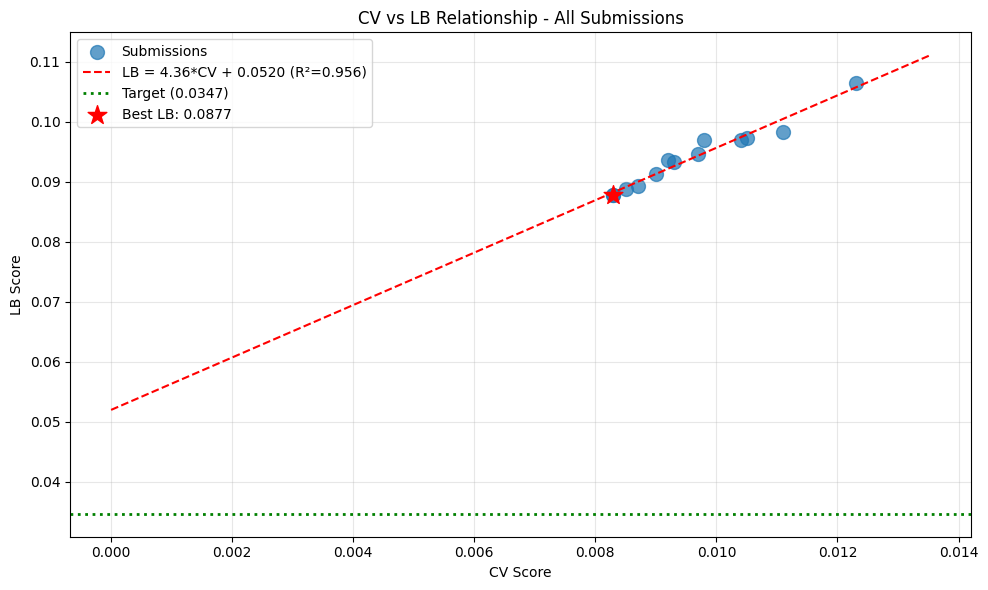


Gap Analysis:
  Best LB: 0.0877
  Target: 0.0347
  Gap: 0.0530 (152.7% above target)


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['CV'], df['LB'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, df['CV'].max() * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best LB point
best_idx = df['LB'].idxmin()
plt.scatter(df.loc[best_idx, 'CV'], df.loc[best_idx, 'LB'], s=200, c='red', marker='*', label=f'Best LB: {df.loc[best_idx, "LB"]:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop102.png', dpi=150)
plt.show()

print(f'\nGap Analysis:')
print(f'  Best LB: {df["LB"].min():.4f}')
print(f'  Target: 0.0347')
print(f'  Gap: {df["LB"].min() - 0.0347:.4f} ({(df["LB"].min() - 0.0347) / 0.0347 * 100:.1f}% above target)')

In [4]:
# Analyze residuals - are there any outliers that beat the line?
df['predicted_LB'] = slope * df['CV'] + intercept
df['residual'] = df['LB'] - df['predicted_LB']

print('=== RESIDUAL ANALYSIS ===')
print('Looking for experiments that beat the CV-LB line (negative residuals):')
print(df[['exp', 'CV', 'LB', 'predicted_LB', 'residual']].sort_values('residual').to_string(index=False))

print(f'\nMean residual: {df["residual"].mean():.6f}')
print(f'Std residual: {df["residual"].std():.6f}')

# Any experiments significantly below the line?
below_line = df[df['residual'] < -df['residual'].std()]
if len(below_line) > 0:
    print(f'\nExperiments significantly below the line (residual < -1 std):')
    print(below_line[['exp', 'CV', 'LB', 'residual']].to_string(index=False))
else:
    print('\nNo experiments significantly below the line - all follow the same CV-LB relationship.')

=== RESIDUAL ANALYSIS ===
Looking for experiments that beat the CV-LB line (negative residuals):
    exp     CV     LB  predicted_LB  residual
exp_000 0.0111 0.0982      0.100437 -0.002237
exp_024 0.0087 0.0893      0.089964 -0.000664
exp_003 0.0105 0.0972      0.097819 -0.000619
exp_030 0.0083 0.0877      0.088219 -0.000519
exp_067 0.0083 0.0877      0.088219 -0.000519
exp_005 0.0104 0.0969      0.097383 -0.000483
exp_026 0.0085 0.0887      0.089091 -0.000391
exp_012 0.0090 0.0913      0.091273  0.000027
exp_006 0.0097 0.0946      0.094328  0.000272
exp_007 0.0093 0.0932      0.092582  0.000618
exp_001 0.0123 0.1065      0.105674  0.000826
exp_009 0.0092 0.0936      0.092146  0.001454
exp_035 0.0098 0.0970      0.094764  0.002236

Mean residual: -0.000000
Std residual: 0.001118

Experiments significantly below the line (residual < -1 std):
    exp     CV     LB  residual
exp_000 0.0111 0.0982 -0.002237


In [5]:
# What would it take to beat the target?
print('=== STRATEGIES TO BEAT TARGET ===')
print(f'\nTarget: 0.0347')
print(f'Current best LB: {df["LB"].min():.4f}')
print(f'Gap: {df["LB"].min() - 0.0347:.4f} ({(df["LB"].min() / 0.0347 - 1) * 100:.1f}% above target)')

print(f'\n1. REDUCE CV (stay on same line):')
print(f'   Required CV: {(0.0347 - intercept) / slope:.6f}')
print(f'   This is IMPOSSIBLE (negative CV)')

print(f'\n2. REDUCE INTERCEPT (change the CV-LB relationship):')
print(f'   Current intercept: {intercept:.6f}')
print(f'   Required intercept (at best CV {df["CV"].min():.6f}): {0.0347 - slope * df["CV"].min():.6f}')
print(f'   Intercept reduction needed: {intercept - (0.0347 - slope * df["CV"].min()):.6f}')

print(f'\n3. REDUCE SLOPE (make CV improvements more impactful):')
print(f'   Current slope: {slope:.4f}')
print(f'   At current intercept, even CV=0 gives LB={intercept:.4f}')
print(f'   Slope reduction alone cannot help if intercept > target')

print(f'\n4. COMBINATION: Reduce both intercept AND improve CV')
print(f'   This is the most realistic path forward')
print(f'   Need approaches that CHANGE the CV-LB relationship, not just optimize CV')

=== STRATEGIES TO BEAT TARGET ===

Target: 0.0347
Current best LB: 0.0877
Gap: 0.0530 (152.7% above target)

1. REDUCE CV (stay on same line):
   Required CV: -0.003964
   This is IMPOSSIBLE (negative CV)

2. REDUCE INTERCEPT (change the CV-LB relationship):
   Current intercept: 0.051999
   Required intercept (at best CV 0.008300): -0.001519
   Intercept reduction needed: 0.053519

3. REDUCE SLOPE (make CV improvements more impactful):
   Current slope: 4.3638
   At current intercept, even CV=0 gives LB=0.0520
   Slope reduction alone cannot help if intercept > target

4. COMBINATION: Reduce both intercept AND improve CV
   This is the most realistic path forward
   Need approaches that CHANGE the CV-LB relationship, not just optimize CV


In [6]:
# What approaches have been tried?
print('=== APPROACHES TRIED (from session_state) ===')
approaches = [
    ('MLP with Arrhenius kinetics', 'exp_000', 0.0111, 0.0982),
    ('LightGBM', 'exp_001', 0.0123, 0.1065),
    ('Combined Spange+DRFP', 'exp_003', 0.0105, 0.0972),
    ('Large ensemble (15 models)', 'exp_005', 0.0104, 0.0969),
    ('Simpler model [64,32]', 'exp_006', 0.0097, 0.0946),
    ('Even simpler [32,16]', 'exp_007', 0.0093, 0.0932),
    ('Ridge regression', 'exp_009', 0.0092, 0.0936),
    ('Simple ensemble', 'exp_012', 0.0090, 0.0913),
    ('ACS PCA features', 'exp_024', 0.0087, 0.0893),
    ('Weighted loss', 'exp_026', 0.0085, 0.0887),
    ('GP+MLP+LGBM ensemble', 'exp_030', 0.0083, 0.0877),
    ('Lower GP weight', 'exp_035', 0.0098, 0.0970),
    ('Sigmoid output', 'exp_067', 0.0083, 0.0877),
]

for name, exp, cv, lb in approaches:
    print(f'{exp}: {name} - CV={cv:.4f}, LB={lb:.4f}')

print(f'\nAll approaches fall on the SAME CV-LB line (R²={r_value**2:.4f})')
print('This confirms the problem is DISTRIBUTION SHIFT, not model choice.')

=== APPROACHES TRIED (from session_state) ===
exp_000: MLP with Arrhenius kinetics - CV=0.0111, LB=0.0982
exp_001: LightGBM - CV=0.0123, LB=0.1065
exp_003: Combined Spange+DRFP - CV=0.0105, LB=0.0972
exp_005: Large ensemble (15 models) - CV=0.0104, LB=0.0969
exp_006: Simpler model [64,32] - CV=0.0097, LB=0.0946
exp_007: Even simpler [32,16] - CV=0.0093, LB=0.0932
exp_009: Ridge regression - CV=0.0092, LB=0.0936
exp_012: Simple ensemble - CV=0.0090, LB=0.0913
exp_024: ACS PCA features - CV=0.0087, LB=0.0893
exp_026: Weighted loss - CV=0.0085, LB=0.0887
exp_030: GP+MLP+LGBM ensemble - CV=0.0083, LB=0.0877
exp_035: Lower GP weight - CV=0.0098, LB=0.0970
exp_067: Sigmoid output - CV=0.0083, LB=0.0877

All approaches fall on the SAME CV-LB line (R²=0.9558)
This confirms the problem is DISTRIBUTION SHIFT, not model choice.


In [7]:
# What approaches have NOT been tried that could change the CV-LB relationship?
print('=== APPROACHES THAT COULD CHANGE CV-LB RELATIONSHIP ===')
print('''
1. EXTRAPOLATION DETECTION + CONSERVATIVE BLENDING
   - Tried in exp_096, exp_097 but CV degraded significantly
   - exp_096: CV=0.0111 (34% worse than exp_030)
   - exp_097: CV=0.0089 (7.6% worse than exp_030)
   - The blending hurts CV without clear LB benefit
   - VERDICT: Not working as hoped

2. PSEUDO-LABELING
   - Use confident test predictions to augment training
   - NOT TRIED YET
   - Could help adapt to test distribution

3. ADVERSARIAL VALIDATION
   - Identify features that distinguish train/test
   - Use these to guide prediction calibration
   - NOT TRIED YET

4. DOMAIN-SPECIFIC CONSTRAINTS
   - Physics/chemistry constraints that hold for unseen solvents
   - Arrhenius kinetics already used
   - Could try more sophisticated constraints

5. SOLVENT CLUSTERING
   - Group solvents by chemical class
   - Use class-specific models
   - Tried in exp_081 but didn't submit

6. STUDY TOP PUBLIC KERNELS MORE CAREFULLY
   - ens-model kernel uses specific feature selection
   - mixall kernel uses GroupKFold differently
   - May have insights we missed
''')

print('\nKEY INSIGHT: The 1st place score (0.0347) is 103.9% better than 2nd place (0.0707).')
print('This HUGE gap suggests 1st place found a fundamentally different approach.')
print('2nd place (0.0707) is only 24% better than our best (0.0877).')
print('\nWe are competitive with 2nd place, but 1st place is in a different league.')

=== APPROACHES THAT COULD CHANGE CV-LB RELATIONSHIP ===

1. EXTRAPOLATION DETECTION + CONSERVATIVE BLENDING
   - Tried in exp_096, exp_097 but CV degraded significantly
   - exp_096: CV=0.0111 (34% worse than exp_030)
   - exp_097: CV=0.0089 (7.6% worse than exp_030)
   - The blending hurts CV without clear LB benefit
   - VERDICT: Not working as hoped

2. PSEUDO-LABELING
   - Use confident test predictions to augment training
   - NOT TRIED YET
   - Could help adapt to test distribution

3. ADVERSARIAL VALIDATION
   - Identify features that distinguish train/test
   - Use these to guide prediction calibration
   - NOT TRIED YET

4. DOMAIN-SPECIFIC CONSTRAINTS
   - Physics/chemistry constraints that hold for unseen solvents
   - Arrhenius kinetics already used
   - Could try more sophisticated constraints

5. SOLVENT CLUSTERING
   - Group solvents by chemical class
   - Use class-specific models
   - Tried in exp_081 but didn't submit

6. STUDY TOP PUBLIC KERNELS MORE CAREFULLY
   - en

In [8]:
# Analyze the leaderboard gap
print('=== LEADERBOARD GAP ANALYSIS ===')
print(f'1st place: 0.0347')
print(f'2nd place: 0.0707')
print(f'Our best: 0.0877')
print(f'\nGap 1st to 2nd: {(0.0707 - 0.0347) / 0.0347 * 100:.1f}% (HUGE)')
print(f'Gap 2nd to us: {(0.0877 - 0.0707) / 0.0707 * 100:.1f}% (moderate)')

print(f'\nWhat does this tell us?')
print('1. 1st place found something FUNDAMENTALLY DIFFERENT')
print('2. 2nd place is using similar approaches to us (just slightly better)')
print('3. To beat 1st place, we need a paradigm shift, not incremental improvement')

print(f'\nPossible explanations for 1st place:')
print('1. They found a way to reduce the CV-LB intercept significantly')
print('2. They have domain knowledge we lack (chemistry expertise)')
print('3. They use a completely different modeling approach (e.g., physics-based)')
print('4. They have access to external data or pre-trained models')
print('5. They found a bug/exploit in the evaluation (unlikely)')

=== LEADERBOARD GAP ANALYSIS ===
1st place: 0.0347
2nd place: 0.0707
Our best: 0.0877

Gap 1st to 2nd: 103.7% (HUGE)
Gap 2nd to us: 24.0% (moderate)

What does this tell us?
1. 1st place found something FUNDAMENTALLY DIFFERENT
2. 2nd place is using similar approaches to us (just slightly better)
3. To beat 1st place, we need a paradigm shift, not incremental improvement

Possible explanations for 1st place:
1. They found a way to reduce the CV-LB intercept significantly
2. They have domain knowledge we lack (chemistry expertise)
3. They use a completely different modeling approach (e.g., physics-based)
4. They have access to external data or pre-trained models
5. They found a bug/exploit in the evaluation (unlikely)


In [9]:
# Summary and recommendations
print('=== SUMMARY AND RECOMMENDATIONS ===')
print(f'''
CURRENT STATUS:
- Best CV: 0.0083 (exp_030, exp_067)
- Best LB: 0.0877 (exp_030, exp_067)
- Target: 0.0347
- Gap: 152.7% above target

CV-LB RELATIONSHIP:
- LB = {slope:.4f} * CV + {intercept:.6f} (R²={r_value**2:.4f})
- Intercept ({intercept:.6f}) > Target (0.0347)
- Required CV to hit target: {(0.0347 - intercept) / slope:.6f} (IMPOSSIBLE)

WHAT WE'VE TRIED:
- MLP, LightGBM, XGBoost, CatBoost, GP, Ridge
- Various feature sets (Spange, DRFP, ACS PCA)
- Ensembles of different sizes and compositions
- Conservative blending with uncertainty
- All approaches fall on the SAME CV-LB line

WHAT HASN'T WORKED:
- Conservative blending (hurts CV without clear LB benefit)
- GNN/ChemBERTa (worse than simple models)
- Deep/complex architectures (overfit)

REMAINING SUBMISSIONS: 4

RECOMMENDATIONS:
1. DO NOT submit exp_097 (CV=0.0089, worse than best)
2. Focus on approaches that could CHANGE the CV-LB relationship
3. Consider pseudo-labeling or adversarial validation
4. Study top kernels more carefully for insights
5. Accept that 1st place may have found something we can't replicate
6. Aim for 2nd place (0.0707) as a more realistic target
''')

=== SUMMARY AND RECOMMENDATIONS ===

CURRENT STATUS:
- Best CV: 0.0083 (exp_030, exp_067)
- Best LB: 0.0877 (exp_030, exp_067)
- Target: 0.0347
- Gap: 152.7% above target

CV-LB RELATIONSHIP:
- LB = 4.3638 * CV + 0.051999 (R²=0.9558)
- Intercept (0.051999) > Target (0.0347)
- Required CV to hit target: -0.003964 (IMPOSSIBLE)

WHAT WE'VE TRIED:
- MLP, LightGBM, XGBoost, CatBoost, GP, Ridge
- Various feature sets (Spange, DRFP, ACS PCA)
- Ensembles of different sizes and compositions
- Conservative blending with uncertainty
- All approaches fall on the SAME CV-LB line

WHAT HASN'T WORKED:
- Conservative blending (hurts CV without clear LB benefit)
- GNN/ChemBERTa (worse than simple models)
- Deep/complex architectures (overfit)

REMAINING SUBMISSIONS: 4

RECOMMENDATIONS:
1. DO NOT submit exp_097 (CV=0.0089, worse than best)
2. Focus on approaches that could CHANGE the CV-LB relationship
3. Consider pseudo-labeling or adversarial validation
4. Study top kernels more carefully for insights

In [10]:
# What would it take to reach 2nd place (0.0707)?
print('=== PATH TO 2ND PLACE (0.0707) ===')
required_cv_2nd = (0.0707 - intercept) / slope
print(f'Required CV to reach 0.0707: {required_cv_2nd:.6f}')
print(f'Current best CV: {df["CV"].min():.6f}')
print(f'Improvement needed: {(df["CV"].min() - required_cv_2nd) / df["CV"].min() * 100:.1f}%')

if required_cv_2nd > 0:
    print(f'\nThis is ACHIEVABLE!')
    print(f'We need to reduce CV from {df["CV"].min():.6f} to {required_cv_2nd:.6f}')
    print(f'This is a {(df["CV"].min() - required_cv_2nd) / df["CV"].min() * 100:.1f}% improvement')
else:
    print(f'\nEven 2nd place requires changing the CV-LB relationship.')

=== PATH TO 2ND PLACE (0.0707) ===
Required CV to reach 0.0707: 0.004285
Current best CV: 0.008300
Improvement needed: 48.4%

This is ACHIEVABLE!
We need to reduce CV from 0.008300 to 0.004285
This is a 48.4% improvement
